# Are Females Really Bad At Driving?

**Objectives:**
- yes or no explain what factors contribute if any
- if yes then how can we improve their driving and if no then why do people have this misconception?

--------------

## 🧾Description: 
This data set is collected from Addis Ababa Sub-city police departments for finding out if Females really are bad at driving or is it just a false perception people have. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. All the sensitive information has been excluded during data encoding and finally, It has 32 features and 12316 instances of accidents.

---------------

## 📖MetaData:
- **Time** — time of the accident (In 24 hours format)
- **Day_of_week** — A day when an accident occurred
- **Age_band_of_driver** —The age group of the driver
- **Sex_of_driver** — Gender of driver
- **Educational_level** — Driver’s highest education level
- **Vehicle_driver_relation** — What’s the relation of a driver with the vehicle
- **Driving_experience** — How many years of driving experience the driver has
- **Type_of_vehicle** — What’s the type of vehicle
- **Owner_of_vehicle** — Who’s the owner of the vehicle
- **Service_year_of_vehicle** — The last service year of the vehicle
- **Defect_of_vehicle** — Is there any defect on the vehicle or not?
- **Area_accident_occured** — Locality of an accident site
- **Lanes_or_Medians** — Are there any lanes or medians at the accident site?
- **Road_allignment** — Road alignment with the terrain of the land
- **Types_of_junction** — Type of junction at the accident site
- **Road_surface_type** — A surface type of road
- **Road_surface_conditions** — What was the condition of the road surface?
- **Light_conditions** — Lighting conditions at the site
- **Weather_conditions** — Weather situation at the site of an accident
- **Type_of_collision** — What is the type of collision
- **Number_of_vehicles_involved** — Total number of vehicles involved in an accident
- **Number_of_casualties** — Total number of casualties in an accident
- **Vehicle_movement** — How the vehicle was moving before the accident occurred
- **Casualty_class** — A person who got killed during an accident
- **Sex_of_casualty** — What the gender of a person who got killed
- **Age_band_of_casualty** — Age group of casualty
- **Casualty_severtiy** — How severely the casualty was injured
- **Work_of_casualty** — What was the work of the casualty
- **Fitness_of_casualty** — Fitness level of casualty
- **Pedestrain_movement** — Was there any pedestrian movement on the road?
- **Cause_of-accident** — What was the cause of an accident?
- **Accident_severity** — How severe an accident was? (Target variable)

-----------------

**Columns needed for analysis:** 
Cause_of_accident, Pedestrian_movement, Age_band_of_casualty, Casualty_class, Vehicle_movement, Number_of_casualties, Number_of_vehicles_involved, Type_of_collision, Weather_conditions, Light_conditions, Road_surface_conditions, Road_surface_type, Types_of_junction, Road_allignment, Defect_of_vehicle, Service_year_of_vehicle, Driving_experience,  Vehicle_driver_relation, Educational_level, Sex_of_driver, Age_band_of_driver, Time.

_Note_: These are not the final columns, will conclude later in analysis after exploring the data.

In [1]:
# Import the required libraries and load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import plotly.express as px
import plotly as pio
import mplcyberpunk as cyb
import plotly.graph_objects as go
# pio.renderers.default = 'browser'

In [2]:
df = pd.read_csv('RTA Dataset.csv')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [3]:
df = df[['Time', 'Light_conditions', 'Sex_of_driver','Age_band_of_driver', 'Driving_experience', 'Educational_level', 'Cause_of_accident', 'Vehicle_movement', 'Vehicle_driver_relation', 'Pedestrian_movement', 'Age_band_of_casualty', 'Casualty_class', 'Number_of_casualties', 'Number_of_vehicles_involved', 'Type_of_collision', 'Weather_conditions', 'Road_surface_conditions', 'Road_surface_type', 'Types_of_Junction', 'Road_allignment', 'Defect_of_vehicle', 'Service_year_of_vehicle']]
df.head()

,Time,Light_conditions,Sex_of_driver,Age_band_of_driver,Driving_experience,Educational_level,Cause_of_accident,Vehicle_movement,Vehicle_driver_relation,Pedestrian_movement,...,Number_of_casualties,Number_of_vehicles_involved,Type_of_collision,Weather_conditions,Road_surface_conditions,Road_surface_type,Types_of_Junction,Road_allignment,Defect_of_vehicle,Service_year_of_vehicle
0,17:02:00,Daylight,Male,18-30,1-2yr,Above high school,Moving Backward,Going straight,Employee,Not a Pedestrian,...,2,2,Collision with roadside-parked vehicles,Normal,Dry,Asphalt roads,No junction,Tangent road with flat terrain,No defect,Above 10yr
1,17:02:00,Daylight,Male,31-50,Above 10yr,Junior high school,Overtaking,Going straight,Employee,Not a Pedestrian,...,2,2,Vehicle with vehicle collision,Normal,Dry,Asphalt roads,No junction,Tangent road with flat terrain,No defect,5-10yrs
2,17:02:00,Daylight,Male,18-30,1-2yr,Junior high school,Changing lane to the left,Going straight,Employee,Not a Pedestrian,...,2,2,Collision with roadside objects,Normal,Dry,Asphalt roads,No junction,NaN,No defect,NaN
3,1:06:00,Darkness - lights lit,Male,18-30,5-10yr,Junior high school,Changing lane to the right,Going straight,Employee,Not a Pedestrian,...,2,2,Vehicle with vehicle collision,Normal,Dry,Earth roads,Y Shape,Tangent road with mild grade and flat terrain,No defect,NaN
4,1:06:00,Darkness - lights lit,Male,18-30,2-5yr,Junior high school,Overtaking,Going straight,Employee,Not a Pedestrian,...,2,2,Vehicle with vehicle collision,Normal,Dry,Asphalt roads,Y Shape,Tangent road with flat terrain,No defect,5-10yrs


In [4]:
df.columns

Index(['Time', 'Light_conditions', 'Sex_of_driver', 'Age_band_of_driver',
       'Driving_experience', 'Educational_level', 'Cause_of_accident',
       'Vehicle_movement', 'Vehicle_driver_relation', 'Pedestrian_movement',
       'Age_band_of_casualty', 'Casualty_class', 'Number_of_casualties',
       'Number_of_vehicles_involved', 'Type_of_collision',
       'Weather_conditions', 'Road_surface_conditions', 'Road_surface_type',
       'Types_of_Junction', 'Road_allignment', 'Defect_of_vehicle',
       'Service_year_of_vehicle'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Light_conditions             12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Age_band_of_driver           12316 non-null  object
 4   Driving_experience           11487 non-null  object
 5   Educational_level            11575 non-null  object
 6   Cause_of_accident            12316 non-null  object
 7   Vehicle_movement             12008 non-null  object
 8   Vehicle_driver_relation      11737 non-null  object
 9   Pedestrian_movement          12316 non-null  object
 10  Age_band_of_casualty         12316 non-null  object
 11  Casualty_class               12316 non-null  object
 12  Number_of_casualties         12316 non-null  int64 
 13  Number_of_vehicles_involved  12

In [6]:
# Since our data has mostly categorical values, we will use the describe function to get the summary of the categorical data
df.describe(include=['O'])

,Time,Light_conditions,Sex_of_driver,Age_band_of_driver,Driving_experience,Educational_level,Cause_of_accident,Vehicle_movement,Vehicle_driver_relation,Pedestrian_movement,Age_band_of_casualty,Casualty_class,Type_of_collision,Weather_conditions,Road_surface_conditions,Road_surface_type,Types_of_Junction,Road_allignment,Defect_of_vehicle,Service_year_of_vehicle
count,12316,12316,12316,12316,11487,11575,12316,12008,11737,12316,12316,12316,12161,12316,12316,12144,11429,12174,7889,8388
unique,1074,4,3,5,7,7,20,13,4,9,6,4,10,9,4,5,8,9,3,6
top,15:30:00,Daylight,Male,18-30,5-10yr,Junior high school,No distancing,Going straight,Employee,Not a Pedestrian,na,Driver or rider,Vehicle with vehicle collision,Normal,Dry,Asphalt roads,Y Shape,Tangent road with flat terrain,No defect,Unknown
freq,120,8798,11437,4271,3363,7619,2263,8158,9627,11390,4443,4944,8774,10063,9340,11296,4543,10459,7777,2883


In [7]:
df.isnull().sum() * 100 / len(df)

Time                            0.000000
Light_conditions                0.000000
Sex_of_driver                   0.000000
Age_band_of_driver              0.000000
Driving_experience              6.731082
Educational_level               6.016564
Cause_of_accident               0.000000
Vehicle_movement                2.500812
Vehicle_driver_relation         4.701202
Pedestrian_movement             0.000000
Age_band_of_casualty            0.000000
Casualty_class                  0.000000
Number_of_casualties            0.000000
Number_of_vehicles_involved     0.000000
Type_of_collision               1.258525
Weather_conditions              0.000000
Road_surface_conditions         0.000000
Road_surface_type               1.396557
Types_of_Junction               7.202014
Road_allignment                 1.152972
Defect_of_vehicle              35.945112
Service_year_of_vehicle        31.893472
dtype: float64

In [8]:
# checking how many instances were female where defect of vehicle is not recorded
df['Sex_of_driver'].loc[df['Defect_of_vehicle'].isnull()].value_counts()

Male       4103
Female      251
Unknown      73
Name: Sex_of_driver, dtype: int64

In [9]:
df['Casualty_class'].value_counts()

Driver or rider    4944
na                 4443
Pedestrian         1649
Passenger          1280
Name: Casualty_class, dtype: int64

In [10]:
df['Defect_of_vehicle'].unique()

array(['No defect', nan, '7', '5'], dtype=object)

**Note:** _The values 5 and 7 represent a certain defect in the vehicle hence we will simply change them to defected as we do not have exact information that what type of defect do 5 or 7 represent._

In [11]:
# using replace function to replace the 5 and 7 values with Defected string
df['Defect_of_vehicle'].replace('5', 'Defected', inplace=True)
df['Defect_of_vehicle'].replace('7', 'Defected', inplace=True)

In [12]:
# finding out number of rows where service year of vehicle and defect of vehicle are both null
df['Pedestrian_movement'].value_counts()
# since certain values are unclear we will drop the column

Not a Pedestrian                                                                                                                         11390
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                              337
Unknown or other                                                                                                                           293
Crossing from driver's nearside                                                                                                            140
Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle                                                               72
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)                                                              46
Walking along in carriageway, back to traffic                                                                                               18

In [13]:
df['Defect_of_vehicle'].unique() 

array(['No defect', nan, 'Defected'], dtype=object)

In [14]:
# we will now fill the missing values with unknown string since we don't know the defect of vehicle or other important information which might have not been available hence is missing in dataset
df['Defect_of_vehicle'].fillna('Unknown', inplace=True)
df['Service_year_of_vehicle'].fillna('Unknown', inplace=True)
df['Driving_experience'].fillna('Unknown', inplace=True)
df['Vehicle_driver_relation'].fillna('Unknown', inplace=True)
df['Educational_level'].fillna('Unknown', inplace=True)
df['Road_allignment'].fillna('Unknown', inplace=True)
df['Types_of_Junction'].fillna('Unknown', inplace=True)
df['Road_surface_type'].fillna('Unknown', inplace=True)
df['Type_of_collision'].fillna('Unknown', inplace=True)
df['Vehicle_movement'].fillna('Unknown', inplace=True)

In [15]:
df['Vehicle_movement'].value_counts()

Going straight         8158
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Unknown                 396
Getting off             339
Entering a junction     193
Overtaking               96
Stopping                 61
U-Turn                   50
Waiting to go            39
Parked                   10
Name: Vehicle_movement, dtype: int64

In [16]:
df['Types_of_Junction'].value_counts()
# also going to drop types of junction since it isnt specified at which point and we can simply use vehicle movement for our analysis instead of the shape of junction

Y Shape        4543
No junction    3837
Crossing       2177
Unknown        1078
Other           445
O Shape         164
T Shape          60
X Shape          12
Name: Types_of_Junction, dtype: int64

In [17]:
# further dropping unneeded and inconsistent/nonsensicle columns
df.drop(['Age_band_of_casualty', 'Pedestrian_movement', 'Number_of_casualties', 'Number_of_vehicles_involved', 'Type_of_collision', 'Types_of_Junction', 'Road_allignment', 'Casualty_class', 'Vehicle_movement', 'Educational_level', 'Road_surface_type', 'Light_conditions', 'Service_year_of_vehicle'], axis=1, inplace=True)
df.head(3)

,Time,Sex_of_driver,Age_band_of_driver,Driving_experience,Cause_of_accident,Vehicle_driver_relation,Weather_conditions,Road_surface_conditions,Defect_of_vehicle
0,17:02:00,Male,18-30,1-2yr,Moving Backward,Employee,Normal,Dry,No defect
1,17:02:00,Male,31-50,Above 10yr,Overtaking,Employee,Normal,Dry,No defect
2,17:02:00,Male,18-30,1-2yr,Changing lane to the left,Employee,Normal,Dry,No defect


In [18]:
# convert object type column into datetime datatype column
df['Time'] = pd.to_datetime(df['Time'])

# Extrating 'Hour_of_Day' feature from the Time column
new_df = df.copy()
new_df['Hour_of_day'] = new_df['Time'].dt.hour
df1 = new_df.drop('Time', axis=1)
col = df1.pop('Hour_of_day')
df1.insert(0, col.name, col)
df1.head()

,Hour_of_day,Sex_of_driver,Age_band_of_driver,Driving_experience,Cause_of_accident,Vehicle_driver_relation,Weather_conditions,Road_surface_conditions,Defect_of_vehicle
0,17,Male,18-30,1-2yr,Moving Backward,Employee,Normal,Dry,No defect
1,17,Male,31-50,Above 10yr,Overtaking,Employee,Normal,Dry,No defect
2,17,Male,18-30,1-2yr,Changing lane to the left,Employee,Normal,Dry,No defect
3,1,Male,18-30,5-10yr,Changing lane to the right,Employee,Normal,Dry,No defect
4,1,Male,18-30,2-5yr,Overtaking,Employee,Normal,Dry,No defect


In [19]:
# checking the correaltion of the categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# select only the categorical variables
cat_vars = df1.select_dtypes(include=['O']).columns.tolist()
cat_vars

# create an empty dataframe to store the results
cramers_v_matrix = pd.DataFrame(index=cat_vars, columns=cat_vars)
cramers_v_matrix

# loop through the variables and calculate the Cramer's V score
for row in cat_vars:
    for col in cat_vars:
        cramers_v_matrix.loc[row, col] = cramers_v(df1[row], df1[col])

cramers_v_matrix

,Sex_of_driver,Age_band_of_driver,Driving_experience,Cause_of_accident,Vehicle_driver_relation,Weather_conditions,Road_surface_conditions,Defect_of_vehicle
Sex_of_driver,1.0,0.359249,0.0,0.008148,0.0,0.032631,0.027506,0.018067
Age_band_of_driver,0.359249,1.0,0.008042,0.012398,0.0,0.046153,0.043874,0.021234
Driving_experience,0.0,0.008042,1.0,0.0,0.413756,0.0,0.006844,0.033477
Cause_of_accident,0.008148,0.012398,0.0,1.0,0.0,0.0,0.0,0.00451
Vehicle_driver_relation,0.0,0.0,0.413756,0.0,1.0,0.0,0.0,0.022755
Weather_conditions,0.032631,0.046153,0.0,0.0,0.0,1.0,0.525914,0.013636
Road_surface_conditions,0.027506,0.043874,0.006844,0.0,0.0,0.525914,1.0,0.0
Defect_of_vehicle,0.018067,0.021234,0.033477,0.00451,0.022755,0.013636,0.0,1.0


------------------

#### Factors In Our Analysis Responsible For The Accidents Are As Follows: 
1. Hour Of Day: Time in hours when accident happened, helps in verifying the light conditions factor too.
2. Sex Of Driver: The gender of the driver male or female.
3. Cause Of Accident: Whether accident happened while changing lanes or reversing etc.
4. Vehicle Driver Relation: This helps us in identifying that if the driver was an employee and the car also happened to be defected then the owner of the car is also partly to blame.
5. Weather Conditions: We can check to see if bad weather conditions played any significant role.
6. Road Surface Condition: We can check to see if any specific road surface condition had an effect.
7. Defect Of Vehicle: Whether the vehicle had any defect.
8. Driving Experience: What was the driving experience of the driver i.e. was he/she a newbie or had considerable experience before.
9. Age Band Of Driver: The age of the driver.

#### Now Let's Visualize The Results And Gather Further Insights!!

-----------------

Finally the answer to the question we've all been waiting for. Are females really the cause of vast amounts of accidents?\
Have a look at the figure below, the results are shocking😱...!!

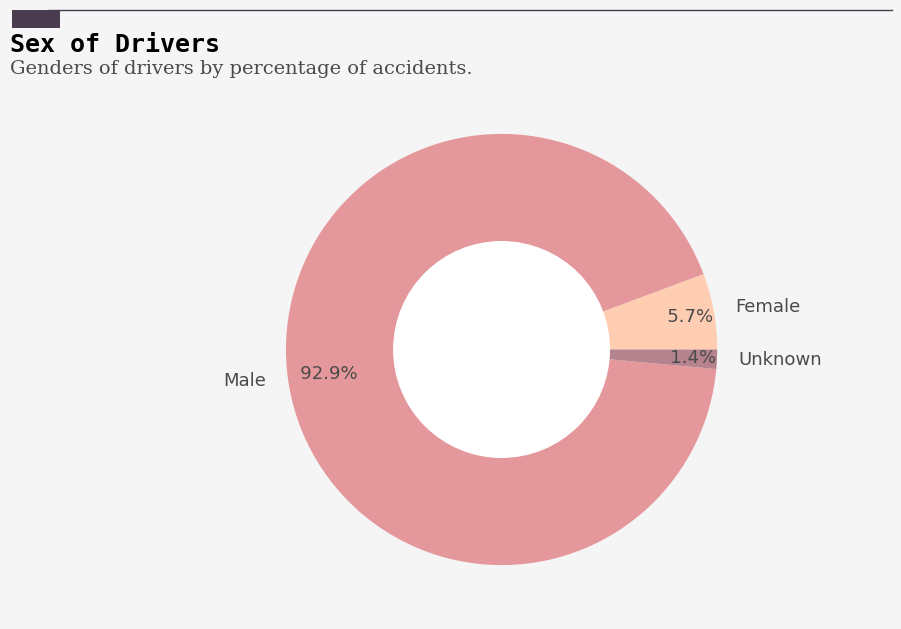

In [20]:
# group the data by sex of driver
sex_counts = df1.groupby('Sex_of_driver').size()

colors = ['#FFCDB2', '#E5989B', '#B5838D']
inner_colors = ['#F5F5F5', '#F0ECEC', '#F5EFEF']

# Create a circle for the center of the chart
my_circle = plt.Circle((0, 0), 0.5, color='w')

# Create the donut chart
fig, ax = plt.subplots(figsize=(8, 7))
# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)
# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([-0.055, 1], [.98, .98], transform=fig.transFigure, clip_on=False, color='#4A3C4F', linewidth=1)
ax.add_patch(plt.Rectangle((-0.099,.98), 0.06, -0.025, facecolor='#4A3C4F', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Plotting Figure
ax.figure.set_facecolor('#f5f5f5')
ax.pie(sex_counts, labels=sex_counts.index, colors=colors, wedgeprops={'width': 0.8}, autopct='   %1.1f%%', pctdistance=0.85, textprops={'fontsize': 13, 'fontweight': 'light', 'color': '#4a4a4a'})
ax.add_artist(my_circle)


# Add a title
ax.text( -2.28, 1.38, 'Sex of Drivers', fontsize=18, fontweight='demibold', fontfamily='monospace')
ax.text(-2.28, 1.28, 'Genders of drivers by percentage of accidents.', fontsize=14, fontweight='light', fontfamily='serif', color='#4a4a4a')

# Show the chart
plt.show()

The majority of accidents(approximately 93%) are done by males, 5.7% by females and 1.4% of accidents occured at the hands of unknown genders. This shows us that women are not bad drivers and it is just a perception people have which can be changed by creating awareness through sharing such information with the general public.

---------------------

Now since we know that males are responsible for almost all of the accidents (93%), so let's explore why.

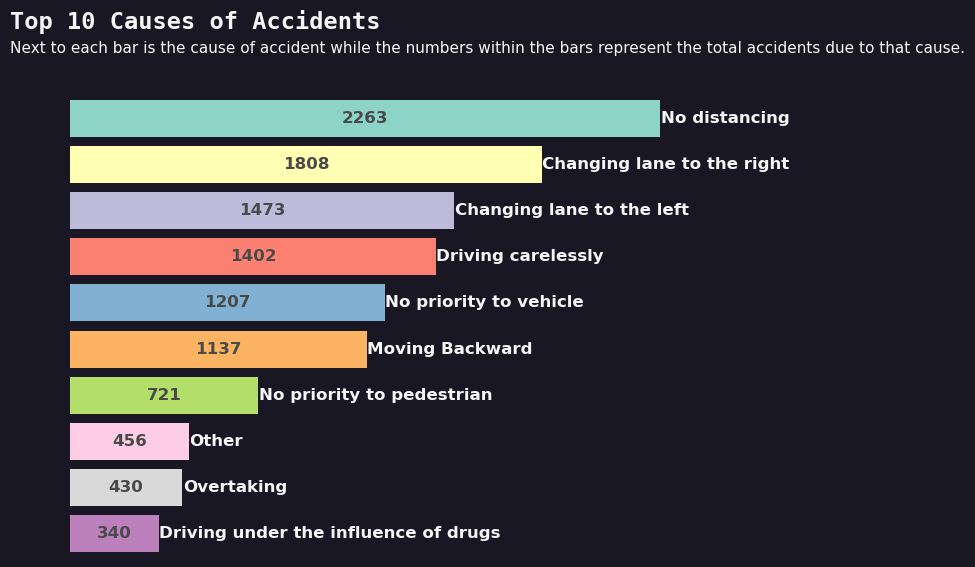

In [21]:
# get top 10 causes of accidents by value counts
top_10_causes = df1['Cause_of_accident'].value_counts().head(10).index.tolist()

# Plotting Figure
with plt.style.context('rose-pine'):
    fig, ax = plt.subplots(figsize=(8, 6))
    # Remove the spines
    ax.spines[['top','left','bottom']].set_visible(False)
# Make the left spine thicker
    ax.spines['right'].set_linewidth(1.1)
    
    ax = sns.countplot(y='Cause_of_accident', data=df1[df1['Cause_of_accident'].isin(top_10_causes)], order=top_10_causes, palette='Set3', saturation=1, alpha=1)

    # add labels within the bars
    for i, patch in enumerate(ax.patches):
        ax.text(patch.get_width() + 2, patch.get_y() + patch.get_height() / 2, df1['Cause_of_accident'].value_counts().index[i], fontweight='bold', fontsize=12, color='#f5f5f5', ha='left', va='center')

    ax.set(ylabel=None, xlabel=None)
    # hide y-axis labels
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_xticks([])

    # add labels within the bars
    for patch in ax.patches:
        width = patch.get_width()
        height = patch.get_height()
        x, y = patch.get_xy()
        ax.text(x + width/2, y + height/2, int(width), fontsize=12, fontweight='bold', color='#4a4a4a', ha='center', va='center')
        # add heading and subheading to the figure
    fig.text(0.05, 0.99, 'Top 10 Causes of Accidents', fontsize=17, fontweight='bold', fontfamily='monospace', color='#f5f5f5')
    fig.text(0.05, 0.95, 'Next to each bar is the cause of accident while the numbers within the bars represent the total accidents due to that cause.', fontsize=11, fontweight='light', color='#f5f5f5')
# Show the chart
plt.show()

The number one cause of accidents is no distancing between vehicles followed by changing of lanes.

These can be prevented by regulating traffic laws which highlight the importance of maintaining distance between the vehicles and emphasizing the need to check plus use indicator when switching lanes.

---------

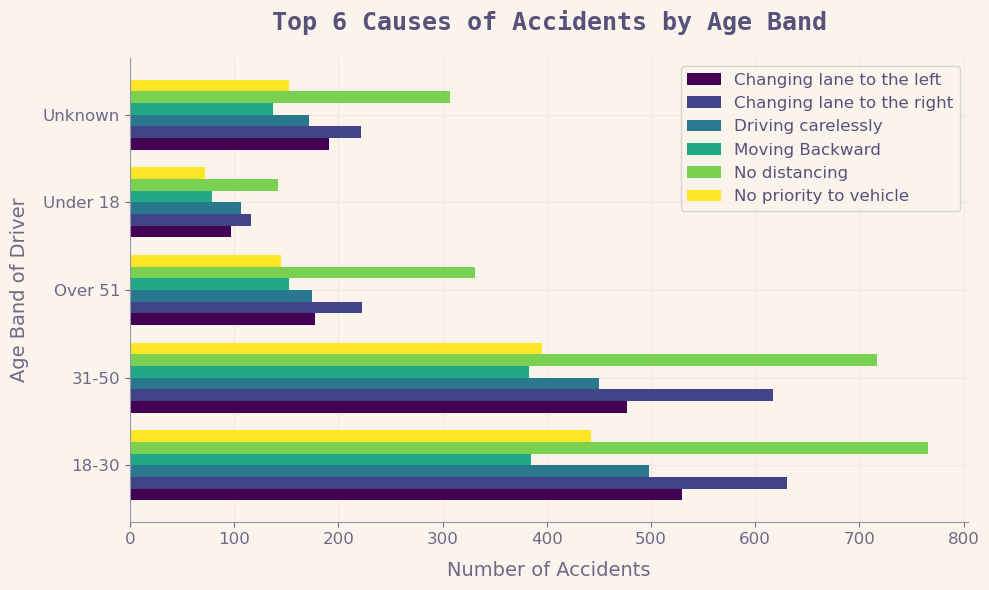

In [22]:
# group the data by age band and cause of accident
age_cause_counts = df1.groupby(['Age_band_of_driver', 'Cause_of_accident']).size().unstack()
age_cause_counts.fillna(0, inplace=True)

# get the top 5 most common causes of accidents for each age band
top_causes = age_cause_counts.apply(lambda x: x.sort_values(ascending=False).head(6), axis=1).fillna(0).astype(int)

# plot the horizontal bar chart
with plt.style.context('rose-pine-dawn'):
    # sns.set_theme(style='whitegrid')
    top_causes.plot(kind='barh', figsize=(10, 6), cmap='viridis', width=.8)
    plt.title('Top 6 Causes of Accidents by Age Band', fontsize=18, fontweight='bold', fontfamily='monospace', pad=20)
    plt.xlabel('Number of Accidents', fontsize=14, fontweight='light', labelpad=10)
    plt.ylabel('Age Band of Driver', fontsize=14, fontweight='light', labelpad=10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

This tells us that all age bands are unified when it comes to accidents because of no distancing with the age band 18-30 leading in this followed by 31-50. Not only that, if you look at all the individual bars you will also see that the age band 18-30 is responsible for most accidents as it almost has all the highest bars for each cause. Surprisingly under 18 age band has caused the least amounts of accidents.

-------------------

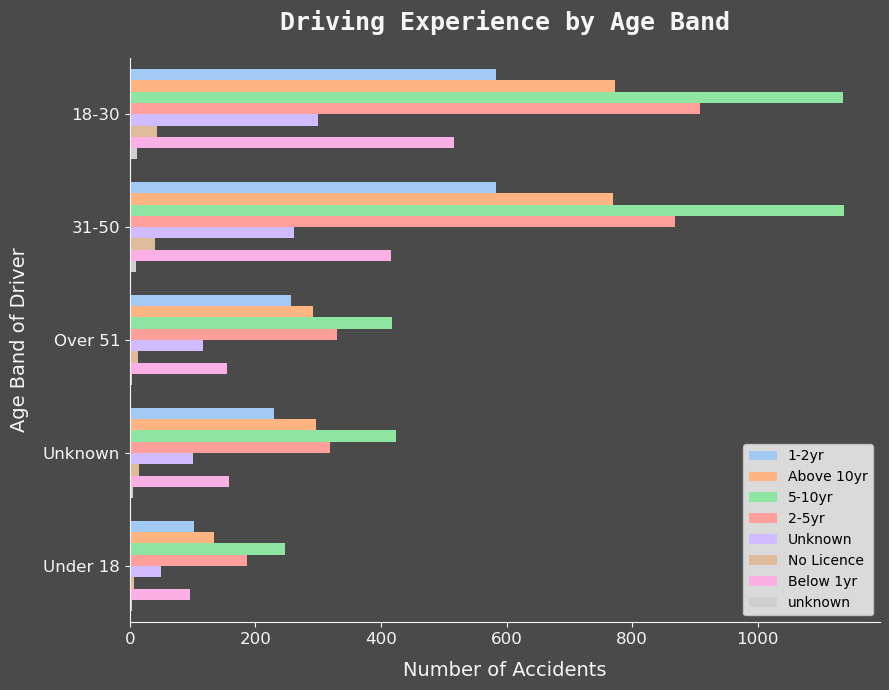

In [23]:
# lets see the age band and the driving experience
age_driving_counts = df1.groupby(['Age_band_of_driver', 'Driving_experience']).size().unstack()
age_driving_counts.fillna(0, inplace=True)

# show the age band and driving experience for each age band
plt.figure(figsize=(9, 7), facecolor='#4a4a4a')
ax = plt.axes()
ax.set_facecolor('#4a4a4a')
# sequential_colors = sns.color_palette("RdPu", 8)
sns.countplot(y='Age_band_of_driver', data=df1, hue='Driving_experience', palette='pastel', saturation=1, order=df1['Age_band_of_driver'].value_counts().index)
plt.title('Driving Experience by Age Band', fontsize=18, fontweight='bold', fontfamily='monospace', pad=20, color='#f5f5f5')
plt.xlabel('Number of Accidents', fontsize=14, fontweight='light', labelpad=10, color='#f5f5f5')
plt.ylabel('Age Band of Driver', fontsize=14, fontweight='light', labelpad=10, color='#f5f5f5')
plt.xticks(fontsize=12, color='#f5f5f5')
plt.yticks(fontsize=12, color='#f5f5f5')
plt.legend(fontsize=10, loc='lower right')
plt.tight_layout()
# changing the ticks and spines color
ax.tick_params(axis='x', colors='#f5f5f5')
ax.tick_params(axis='y', colors='#f5f5f5')
ax.spines['bottom'].set_color('#f5f5f5')
ax.spines['left'].set_color('#f5f5f5')
# removing top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Now this is quite astonishing!! People with 5-10 years of driving experience caused more accidents in every age band. This is concerning given the fact that more experienced people are causing more accidents maybe because they tend to get careless.

This can be avoided by effective campaigns which convey the message of staying vigilant while driving to protect one's life.

-----------

In [24]:
# checking the vehicle driver relation with defect of vehicle and making a plotly sunburst chart
df1['Vehicle_driver_relation'].value_counts()

# creating a dataframe for the sunburst chart
df_sunburst = df1.groupby(['Vehicle_driver_relation', 'Defect_of_vehicle']).size().reset_index(name='count')

# creating the sunburst chart
fig = px.sunburst(df_sunburst, path=['Vehicle_driver_relation', 'Defect_of_vehicle'], values='count', color='count', color_continuous_scale='turbo', width=700, height=650)
fig.update_layout(template = 'ggplot2', title_text='Vehicle Driver Relation By Defect Of Vehicle In Accidents', title=dict(text='Vehicle Driver Relation By Defect Of Vehicle In Accidents', x=0.5, y=0.986), title_font_family='fantasy', title_font_size=24, title_font_color='#4a4a4a', annotations=[dict(text='Counts of accidents that happened by employees or owners with percentage.', x=0.5, y=1.118, font=dict(size=16, color='#4a4a4a'), showarrow=False), dict(text='In how many of those accidents was the vehicle defected/ not defected.', x=0.5, y=1.079, font=dict(size=14, color='#4a4a4a'), showarrow=False)])
fig.update_traces(hovertemplate='<b>%{label}</b><br>%{value}<br>%{percentParent:.1%}<extra></extra>')
fig.update_layout(margin=dict(t=90))
fig.show()

------------

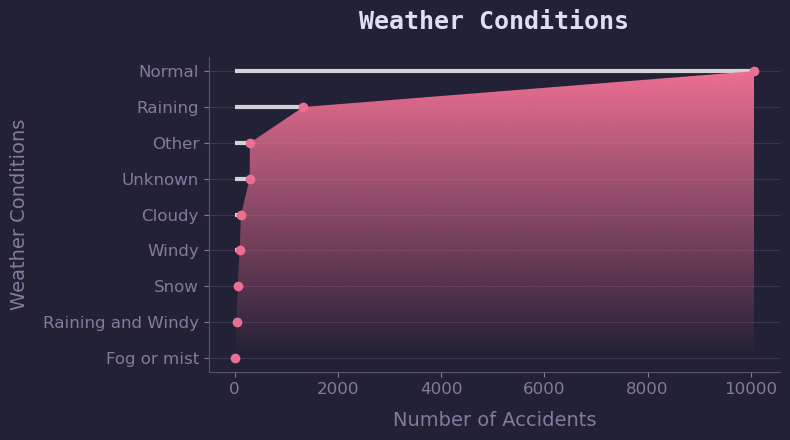

In [25]:
# plot the value counts of the weather conditions in descending order
with plt.style.context('rose-pine-moon'):
    weather_counts = df1['Weather_conditions'].value_counts().sort_values(ascending=True)
    plt.figure(figsize=(8, 4.5))
    plt.hlines(y=weather_counts.index, xmin=0, xmax=weather_counts, color='lightgrey', linewidth=3)
    plt.plot(weather_counts, weather_counts.index, 'o')
    plt.title('Weather Conditions', fontsize=18, fontweight='bold', fontfamily='monospace', pad=20)
    plt.xlabel('Number of Accidents', fontsize=14, fontweight='light', labelpad=10)
    plt.ylabel('Weather Conditions', fontsize=14, fontweight='light', labelpad=10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    cyb.add_gradient_fill()
    plt.tight_layout()
    plt.show()

This is a pretty self explanatory graph of weather conditions and the number of tragedies that happened during that condition. Point to note is that almost all of accidents happened during normal weather condtions. Accidents during rain etc did happen but less compared to normal conditions indicating that weather conditions did not play a big role in the accidents.

-----------

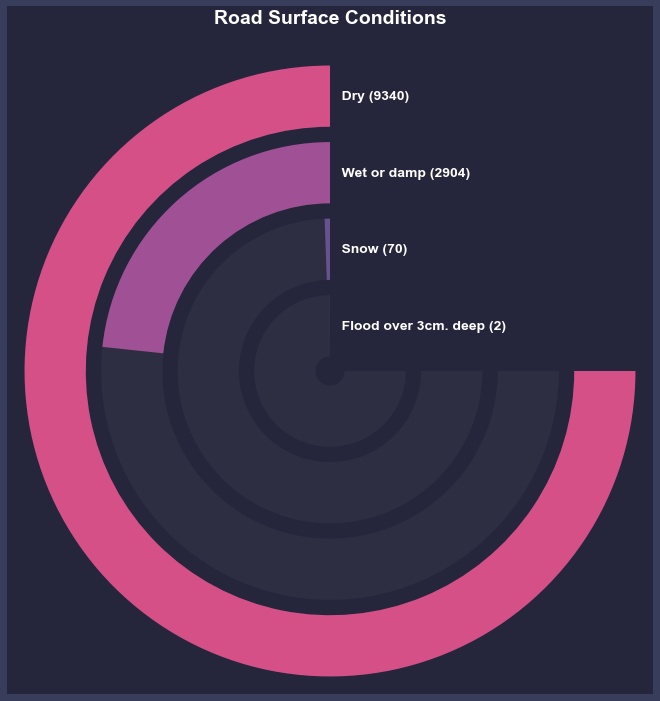

In [26]:
# plot a radial bar chart for the 'Road_surface_conditions' column of df1
with plt.style.context('seaborn-dark'):
    road_counts = df1['Road_surface_conditions'].value_counts().sort_values(ascending=False).iloc[::-1]
    max_value_full_ring = max(road_counts)
    data_len = len(road_counts)
    ring_colours = ['#2f4b7c', '#665191', '#a05195', '#d45087']
    ring_labels = [f'   {x} ({v}) ' for x, v in zip(list(road_counts.index), list(road_counts))]
    fig = plt.figure(figsize=(8, 8), linewidth=10, edgecolor='#393d5c', facecolor='#25253c')
    rect = [0.1, 0.1, 0.8, 0.8]
    ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
    ax_polar_bg.set_theta_zero_location('N')
    ax_polar_bg.set_theta_direction(1)
    for i in range(data_len):
        ax_polar_bg.barh(i, max_value_full_ring*1.5*np.pi/max_value_full_ring, color='grey', alpha=0.1)
    ax_polar_bg.axis('off')
    ax_polar = fig.add_axes(rect, polar=True, frameon=False)
    ax_polar.set_theta_zero_location('N')
    ax_polar.set_theta_direction(1)
    ax_polar.set_rgrids(range(data_len), labels=ring_labels, angle=0, fontsize=10, fontweight='bold', color='white', verticalalignment='center')
    for i in range(data_len):
        ax_polar.barh(i, road_counts[i]*1.5*np.pi/max_value_full_ring, color=ring_colours[i])
    ax_polar.grid(False)
    ax_polar.tick_params(axis='both', left=False, bottom=False, labelbottom=False, labelleft=True)
    plt.title('Road Surface Conditions', fontsize=14, fontweight='bold', pad=20, color='white')
    plt.show()

In this figure, right next to each radial bar is the road surface condition with the number of accidents that occured during that condition in the parentheses. It is evident that the majority of times an accident happened, the road surface condition was dry which is counter intuitive since dry road condition is actually desirable for safe driving. This means accidents most accidents occured not due to any poor road surface condition.

-----------------